<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/TG7_2341720067_ANTONIUS_KAHARAP_KAUTSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [1]:
import google.colab.drive

google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
# Import Library
!pip install annoy

import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

In [3]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

In [4]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 10.2365 ms


In [5]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1583 ms


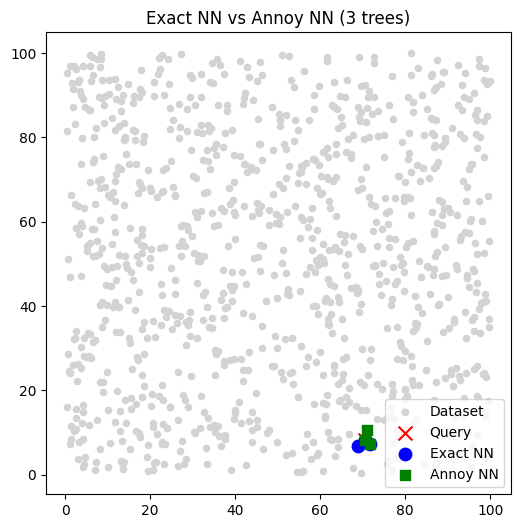

In [6]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# Lab 2

In [7]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 33.3 MB/s eta 0:00:00


In [8]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

In [9]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

In [10]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

In [11]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [12]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0002739429473876953
Waktu IVF+PQ: 0.00018072128295898438


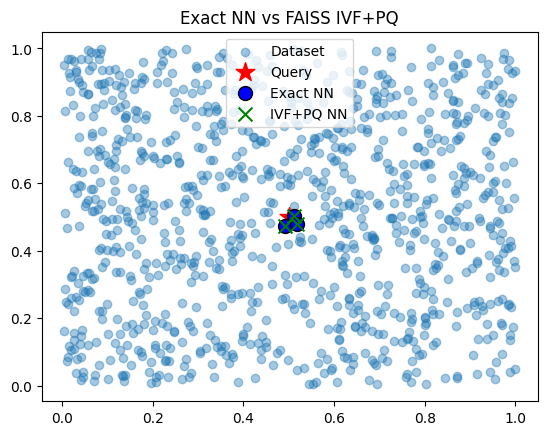

In [13]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# Lab 3

In [14]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528141 sha256=fb7fc8684d6e4064a045ea2fa993a3f7e35ecb0c1b0d42d46fb53452e25f7379
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [15]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

In [16]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

In [17]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.1329975128173828 s


In [18]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00020575523376464844 s


# Lab 4

In [19]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 44.826985359191895 detik
Query time: 0.0003161430358886719 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.020629405975341797 detik
Query time: 0.008837699890136719 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 190.1501190662384 detik
Query time: 0.0002338886260986328 detik
Neighbors: [129179 559276 630783 213191 559393] ...


**Lab 5**

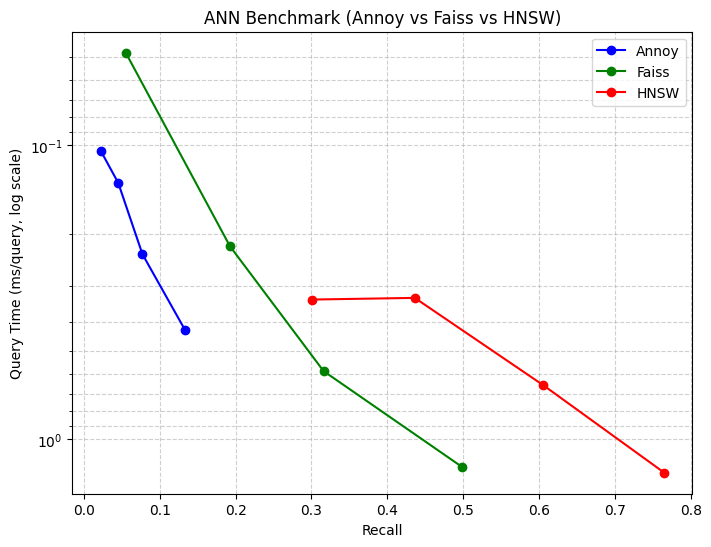

In [20]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Lab Assignment 1

Perform model performance comparison using ANNOY, FAISS, and HNWH using this following criteria, and fill the performance in term of time of execution.

<table>
<thead>
<tr>
<th width="263.32421875">Criteria (Rows/Dimension)</th>
<th>ANNOY</th>
<th>FAISS</th>
<th>HNSW</th>
</tr>
</thead>
<tbody>
<tr>
<td>1000/2D</td>
<td>0.0124 s</td>
<td>0.0762 s</td>
<td>0.0290 s</td>
</tr>
<tr>
<td>1000/5D</td>
<td>0.0085 s</td>
<td>0.0254 s</td>
<td>0.0333 s</td>
</tr>
<tr>
<td>1000000/2D</td>
<td>33.1855 s</td>
<td>1.1956 s</td>
<td>68.8494 s</td>
</tr>
<tr>
<td>1000000/5D</td>
<td>39.3648 s</td>
<td>2.5394 s</td>
<td>118.1813 s</td>
</tr>
</tbody>
</table>


**ANNOY**

1000 Data

In [37]:
np.random.seed(22)
n_points = 1000
X = np.random.rand(n_points, 2) * 100

query = X[np.random.randint(0, n_points)]

f = 2
t = AnnoyIndex(f, 'euclidean')

start_build = time.time()

for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

idx_ann = t.get_nns_by_vector(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"Annoy Build Time for 1000/2D: {build_time:.4f} seconds")
print(f"Annoy Query Time for 1000/2D: {query_time * 1000:.4f} ms")

Annoy Build Time for 1000/2D: 0.0124 seconds
Annoy Query Time for 1000/2D: 0.1373 ms


In [53]:
np.random.seed(22)
n_points = 1000
X = np.random.rand(n_points, 5) * 100

query = X[np.random.randint(0, n_points)]

f = 5
t = AnnoyIndex(f, 'euclidean')

start_build = time.time()

for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

idx_ann = t.get_nns_by_vector(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"Annoy Build Time for 1000/5D: {build_time:.4f} seconds")
print(f"Annoy Query Time for 1000/5D: {query_time * 1000:.4f} ms")

Annoy Build Time for 1000/5D: 0.0085 seconds
Annoy Query Time for 1000/5D: 0.2155 ms


1000000 Data

In [39]:
np.random.seed(22)
n_points = 1000000
X = np.random.rand(n_points, 2).astype(np.float32) * 100

query = X[np.random.randint(0, n_points)]

f = 2
t = AnnoyIndex(f, 'euclidean')

start_build = time.time()

for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(10)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

idx_ann = t.get_nns_by_vector(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"Annoy Build Time for 1000000/2D: {build_time:.4f} seconds")
print(f"Annoy Query Time for 1000000/2D: {query_time * 1000:.4f} ms")

Annoy Build Time for 1000000/2D: 33.1855 seconds
Annoy Query Time for 1000000/2D: 0.1879 ms


In [40]:
np.random.seed(22)
n_points = 1000000
X = np.random.rand(n_points, 5).astype(np.float32) * 100

query = X[np.random.randint(0, n_points)]

f = 5
t = AnnoyIndex(f, 'euclidean')

start_build = time.time()

for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(10)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

idx_ann = t.get_nns_by_vector(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"Annoy Build Time for 1000000/5D: {build_time:.4f} seconds")
print(f"Annoy Query Time for 1000000/5D: {query_time * 1000:.4f} ms")

Annoy Build Time for 1000000/5D: 39.3648 seconds
Annoy Query Time for 1000000/5D: 0.2367 ms


**FAISS**

1000 Data

In [54]:
np.random.seed(22)
X = np.random.rand(1000, 2).astype('float32')
query = np.array([[0.5, 0.5]], dtype='float32')

nlist = 10
m = 2
quantizer = faiss.IndexFlatL2(2)
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)

start_build = time.time()

index_ivfpq.train(X)
index_ivfpq.add(X)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"FAISS Build Time for 1000/2D: {build_time:.4f} seconds")
print(f"FAISS Query Time for 1000/2D: {query_time * 1000:.4f} ms")

FAISS Build Time for 1000/2D: 0.0762 seconds
FAISS Query Time for 1000/2D: 0.2403 ms


In [45]:
dim = 5
n_points = 1000
X = np.random.rand(n_points, dim).astype('float32')

query = X[np.random.randint(0, n_points)].reshape(1, -1)

nlist = 10
m = 5
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)

start_build = time.time()

index_ivfpq.train(X)
index_ivfpq.add(X)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"FAISS Build Time for 1000/5D: {build_time:.4f} seconds")
print(f"FAISS Query Time for 1000/5D: {query_time * 1000:.4f} ms")

FAISS Build Time for 1000/5D: 0.0254 seconds
FAISS Query Time for 1000/5D: 0.1996 ms


1000000 Data



In [43]:
np.random.seed(22)
X = np.random.rand(1000000, 2).astype('float32')
query = np.array([[0.5, 0.5]], dtype='float32')

nlist = 10
m = 2
quantizer = faiss.IndexFlatL2(2)
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)

start_build = time.time()

index_ivfpq.train(X)
index_ivfpq.add(X)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"FAISS Build Time for 1000000/2D: {build_time:.4f} seconds")
print(f"FAISS Query Time for 1000000/2D: {query_time * 1000:.4f} ms")

FAISS Build Time for 1000000/2D: 1.1956 seconds
FAISS Query Time for 1000000/2D: 1.2450 ms


In [46]:
dim = 5
n_points = 1000000
X = np.random.rand(n_points, dim).astype('float32')

query = X[np.random.randint(0, n_points)].reshape(1, -1)

nlist = 10
m = 5
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)

start_build = time.time()

index_ivfpq.train(X)
index_ivfpq.add(X)

end_build = time.time()
build_time = end_build - start_build

start_query = time.time()

D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)

end_query = time.time()
query_time = end_query - start_query

print(f"FAISS Build Time for 1000000/5D: {build_time:.4f} seconds")
print(f"FAISS Query Time for 1000000/5D: {query_time * 1000:.4f} ms")

FAISS Build Time for 1000000/5D: 2.5394 seconds
FAISS Query Time for 1000000/5D: 1.3416 ms


**HNSW**

1000 Data

In [49]:
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5
p = hnswlib.Index(space='l2', dim=dim)

start_build = time.time()

p.init_index(max_elements=num_elements, ef_construction=100, M=16)
p.add_items(data)

end_build = time.time()
build_time = end_build - start_build

p.set_ef(50)
start_query = time.time()

labels, distances = p.knn_query(query, k=k)

end_query = time.time()
query_time = end_query - start_query

print("\n=== HNSW ===")
print(f"HNSW Build Time for 1000/2D: {build_time:.4f} seconds")
print(f"HNSW Query Time for 1000/2D: {query_time * 1000:.4f} ms")


=== HNSW ===
HNSW Build Time for 1000/2D: 0.0290 seconds
HNSW Query Time for 1000/2D: 0.1724 ms


In [50]:
num_elements = 1000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)


query = np.random.random((1, dim)).astype(np.float32)
k = 5
p = hnswlib.Index(space='l2', dim=dim)

start_build = time.time()

p.init_index(max_elements=num_elements, ef_construction=100, M=16)
p.add_items(data)

end_build = time.time()
build_time = end_build - start_build

p.set_ef(50)
start_query = time.time()

labels, distances = p.knn_query(query, k=k)

end_query = time.time()
query_time = end_query - start_query

print("\n=== HNSW ===")
print(f"HNSW Build Time for 1000/2D: {build_time:.4f} seconds")
print(f"HNSW Query Time for 1000/2D: {query_time * 1000:.4f} ms")


=== HNSW ===
HNSW Build Time for 1000/2D: 0.0333 seconds
HNSW Query Time for 1000/2D: 0.2241 ms


1000000 Data

In [51]:
num_elements = 1000000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5
p = hnswlib.Index(space='l2', dim=dim)

start_build = time.time()

p.init_index(max_elements=num_elements, ef_construction=100, M=16)
p.add_items(data)

end_build = time.time()
build_time = end_build - start_build

p.set_ef(50)
start_query = time.time()

labels, distances = p.knn_query(query, k=k)

end_query = time.time()
query_time = end_query - start_query

print("\n=== HNSW ===")
print(f"HNSW Build Time for 1000000/2D: {build_time:.4f} seconds")
print(f"HNSW Query Time for 1000000/2D: {query_time * 1000:.4f} ms")


=== HNSW ===
HNSW Build Time for 1000000/2D: 68.8494 seconds
HNSW Query Time for 1000000/2D: 0.1962 ms


In [52]:
num_elements = 1000000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)

query = np.random.random((1, dim)).astype(np.float32)
k = 5
p = hnswlib.Index(space='l2', dim=dim)

start_build = time.time()

p.init_index(max_elements=num_elements, ef_construction=100, M=16)
p.add_items(data)

end_build = time.time()
build_time = end_build - start_build

p.set_ef(50)
start_query = time.time()

labels, distances = p.knn_query(query, k=k)

end_query = time.time()
query_time = end_query - start_query

print("\n=== HNSW ===")
print(f"HNSW Build Time for 1000000/5D: {build_time:.4f} seconds")
print(f"HNSW Query Time for 1000000/5D: {query_time * 1000:.4f} ms")


=== HNSW ===
HNSW Build Time for 1000000/5D: 118.1813 seconds
HNSW Query Time for 1000000/5D: 0.5758 ms


# Lab assignment 2

Conduct an experiment using Annoy, FAISS, and HNSWLIB on a large secondary dataset (Micro Spotify) available at the following link:
👉 https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data

1. Download the data and load the CSV file (select the first dataset of the two available).

2. Select only the numerical features, and normalize them using StandardScaler.

3. Perform nearest track search and compare the results.

4. Compare the performance among Exact NN, Annoy, FAISS, and HNSW.

In [61]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/MLearning/songs_with_attributes_and_lyrics.csv')
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df_features = df.dropna(subset=features + ['name']).reset_index(drop=True)
X = df_features[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10

**Using a song for a reference**

In [62]:
query_song_name = "Gangsta's Paradise"
query_song_indices = df_features[df_features['name'] == query_song_name].index

if len(query_song_indices) > 0:
    query_song_index = query_song_indices[0]
    query_vector = X_scaled[query_song_index]
else:
    print(f"'{query_song_name}' not found. Using the first song as a query.")
    query_song_index = 0
    query_vector = X_scaled[query_song_index]

**ANN**

In [63]:
start_time = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
build_time_exact = time.time() - start_time

start_time = time.time()
distances_exact, indices_exact = nn.kneighbors([query_vector])
query_time_exact = time.time() - start_time

print(f"Build Time: {build_time_exact:.4f} seconds")
print(f"Query Time: {query_time_exact * 1000:.4f} ms")
print("Nearest Neighbors:")
for i in range(k):
    print(f"{i+1}. {df_features.iloc[indices_exact[0][i]]['name']} by {df_features.iloc[indices_exact[0][i]]['artists']} (distance: {distances_exact[0][i]:.4f})")

Build Time: 0.0838 seconds
Query Time: 54.5468 ms
Nearest Neighbors:
1. Gangsta's Paradise by Coolio;L.V. (distance: 0.0000)
2. Gangsta's Paradise by ['Coolio', 'L.V.'] (distance: 0.0040)
3. Ain't No Sunshine by ['Christina Christian'] (distance: 0.3368)
4. Got Me Waiting - Remix by Heavy D & The Boyz (distance: 0.3555)
5. Often - Kygo Remix by The Weeknd (distance: 0.4846)
6. Afraid of Me by Jelly Roll (distance: 0.4879)
7. Wild Horses by ['Prefab Sprout'] (distance: 0.5081)
8. Bug by ['Alex G'] (distance: 0.5301)
9. It's Alright by ['Chanté Moore'] (distance: 0.5361)
10. Sólo Lágrimas by Renacer (distance: 0.5819)


**ANNOY**

In [64]:
f = len(features)
t = AnnoyIndex(f, 'euclidean')

start_build = time.time()
for i, vec in enumerate(X_scaled):
    t.add_item(i, vec)
t.build(10)
end_build = time.time()
build_time_annoy = end_build - start_build

start_query = time.time()
indices_annoy = t.get_nns_by_vector(query_vector, k)
end_query = time.time()
query_time_annoy = end_query - start_query

print(f"Build Time: {build_time_annoy:.4f} seconds")
print(f"Query Time: {query_time_annoy * 1000:.4f} ms")
print("Nearest Neighbors:")
for i in range(k):
    print(f"{i+1}. {df_features.iloc[indices_annoy[i]]['name']} by {df_features.iloc[indices_annoy[i]]['artists']}")

Build Time: 20.1566 seconds
Query Time: 0.3262 ms
Nearest Neighbors:
1. Gangsta's Paradise by Coolio;L.V.
2. Gangsta's Paradise by ['Coolio', 'L.V.']
3. Ain't No Sunshine by ['Christina Christian']
4. Got Me Waiting - Remix by Heavy D & The Boyz
5. Often - Kygo Remix by The Weeknd
6. Afraid of Me by Jelly Roll
7. Wild Horses by ['Prefab Sprout']
8. Bug by ['Alex G']
9. It's Alright by ['Chanté Moore']
10. Plans by ['Maude Latour']


**FAISS**

In [65]:
dim = len(features)
index_faiss = faiss.IndexFlatL2(dim)

start_build = time.time()
index_faiss.add(X_scaled.astype('float32'))
end_build = time.time()
build_time_faiss = end_build - start_build

start_query = time.time()
distances_faiss, indices_faiss = index_faiss.search(np.array([query_vector]).astype('float32'), k)
end_query = time.time()
query_time_faiss = end_query - start_query

print(f"Build Time: {build_time_faiss:.4f} seconds")
print(f"Query Time: {query_time_faiss * 1000:.4f} ms")
print("Nearest Neighbors:")
for i in range(k):
    print(f"{i+1}. {df_features.iloc[indices_faiss[0][i]]['name']} by {df_features.iloc[indices_faiss[0][i]]['artists']} (distance: {distances_faiss[0][i]:.4f})")

Build Time: 0.0448 seconds
Query Time: 7.6957 ms
Nearest Neighbors:
1. Gangsta's Paradise by Coolio;L.V. (distance: 0.0000)
2. Gangsta's Paradise by ['Coolio', 'L.V.'] (distance: 0.0000)
3. Ain't No Sunshine by ['Christina Christian'] (distance: 0.1134)
4. Got Me Waiting - Remix by Heavy D & The Boyz (distance: 0.1264)
5. Often - Kygo Remix by The Weeknd (distance: 0.2348)
6. Afraid of Me by Jelly Roll (distance: 0.2380)
7. Wild Horses by ['Prefab Sprout'] (distance: 0.2581)
8. Bug by ['Alex G'] (distance: 0.2810)
9. It's Alright by ['Chanté Moore'] (distance: 0.2874)
10. Sólo Lágrimas by Renacer (distance: 0.3386)


**HNSW**

In [66]:
num_elements = len(X_scaled)
dim = len(features)
p = hnswlib.Index(space='l2', dim=dim)

start_build = time.time()
p.init_index(max_elements=num_elements, ef_construction=200, M=16)
p.add_items(X_scaled)
end_build = time.time()
build_time_hnsw = end_build - start_build

p.set_ef(50)
start_query = time.time()
indices_hnsw, distances_hnsw = p.knn_query(np.array([query_vector]), k=k)
end_query = time.time()
query_time_hnsw = end_query - start_query

print(f"Build Time: {build_time_hnsw:.4f} seconds")
print(f"Query Time: {query_time_hnsw * 1000:.4f} ms")
print("Nearest Neighbors:")
for i in range(k):
    print(f"{i+1}. {df_features.iloc[indices_hnsw[0][i]]['name']} by {df_features.iloc[indices_hnsw[0][i]]['artists']} (distance: {distances_hnsw[0][i]:.4f})")

Build Time: 239.5428 seconds
Query Time: 0.9191 ms
Nearest Neighbors:
1. Gangsta's Paradise by Coolio;L.V. (distance: 0.0000)
2. Gangsta's Paradise by ['Coolio', 'L.V.'] (distance: 0.0000)
3. Ain't No Sunshine by ['Christina Christian'] (distance: 0.1134)
4. Got Me Waiting - Remix by Heavy D & The Boyz (distance: 0.1264)
5. Often - Kygo Remix by The Weeknd (distance: 0.2348)
6. Afraid of Me by Jelly Roll (distance: 0.2380)
7. Wild Horses by ['Prefab Sprout'] (distance: 0.2581)
8. Bug by ['Alex G'] (distance: 0.2810)
9. It's Alright by ['Chanté Moore'] (distance: 0.2874)
10. Sólo Lágrimas by Renacer (distance: 0.3386)


**Comparison**

In [67]:
print("\n--- Comparison ---")
data = {'Method': ['Exact NN', 'ANNOY', 'FAISS', 'HNSW'],
        'Build Time (s)': [build_time_exact, build_time_annoy, build_time_faiss, build_time_hnsw],
        'Query Time (ms)': [query_time_exact * 1000, query_time_annoy * 1000, query_time_faiss * 1000, query_time_hnsw * 1000]}
comparison_df = pd.DataFrame(data)
print(comparison_df)


--- Comparison ---
     Method  Build Time (s)  Query Time (ms)
0  Exact NN        0.083820        54.546833
1     ANNOY       20.156560         0.326157
2     FAISS        0.044760         7.695675
3      HNSW      239.542823         0.919104


**What I can conclude from this comparison**

In essence, what we have is a trade off between preparation time and actually searching. ANNOY and HNSW had to wait for an age to set up, particularly HNSW, but when set up, found our track nearly immediately. The standard Exact NN method was the reverse, had zero set up time but was the slowest when actually set up.

FAISS is definitely an amazing compromise for us. It was incredibly fast to prepare and was still pretty fast to search for the song. So if we need good compromise between fast search and fast preparation, FAISS is definitely worth the choice.